In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

#### Reading in the dataset

In [5]:
realEstate = pd.read_csv('ottawa-realestate-data.csv')
realEstate.head()

,latitude,longitude,postalCode,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
0,45.442725,-76.048296,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1127.76,1447.80,"2,500,000"
1,45.146541,-75.941510,K0A 1B0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1402.08,609.60,"495,000"
2,45.317009,-76.140878,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,638.86,470.92,"365,000"
3,46.179294,-74.727161,K4C 1H9,7.0,Commercial,NaN,2020.0,NaN,NaN,0.0,NaN,545.59,411.48,"799,000"
4,45.314785,-75.563076,K1G 3N4,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,983.60,402.17,"9,830,500"


#### Understanding the data

In [6]:
realEstate.shape

(1255, 14)

In [118]:
realEstate.describe(include='all')


,latitude,longitude,postalCode,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price,priceNew
count,1254.000000,1254.000000,1198,1225.000000,1191,1024,997.000000,1040.000000,1041.000000,1043.000000,1015.000000,700.000000,700.000000,1233,1.233000e+03
unique,NaN,NaN,877,NaN,10,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528,NaN
top,NaN,NaN,K0A 1L0,NaN,Residential,Detached,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499900,NaN
freq,NaN,NaN,16,NaN,976,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN
mean,45.380384,-75.702938,NaN,47.623673,NaN,NaN,1988.313942,3.028846,2.594621,3.463087,1.103448,64.970814,30.768500,NaN,8.480812e+05
std,0.109854,0.149321,NaN,31.569012,NaN,NaN,30.408741,1.387811,1.207720,5.289265,1.147907,149.931632,76.929997,NaN,9.489087e+05
min,44.999742,-77.971481,NaN,1.000000,NaN,NaN,1847.000000,0.000000,0.000000,0.000000,0.000000,5.940000,3.310000,NaN,3.000000e+03
25%,45.343685,-75.744382,NaN,20.000000,NaN,NaN,1974.000000,2.000000,2.000000,1.000000,0.000000,30.180000,10.060000,NaN,3.999990e+05
50%,45.395979,-75.693733,NaN,47.000000,NaN,NaN,1994.000000,3.000000,2.000000,2.000000,1.000000,31.970000,15.240000,NaN,5.999000e+05
75%,45.428189,-75.652013,NaN,75.000000,NaN,NaN,2013.000000,4.000000,3.000000,4.000000,2.000000,42.110000,23.945000,NaN,9.590000e+05


#### Correlation & Covariance
The term "covariance" denotes the linear relationship between variables. The degree and direction of the linear link between two variables are both measured by "correlation," on the other hand.

In [119]:
print('Covariance:')
realEstate.cov()

Covariance:


,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew
latitude,0.012068,-0.001704,8.458048e-01,-1.005317e-01,-0.018593,-0.015700,-0.094230,-0.016936,-1.318012e+00,6.041229e-01,-2.490153e+03
longitude,-0.001704,0.022297,2.341647e-01,-1.485623e-02,-0.000214,0.000201,-0.028836,-0.005798,-1.315811e+00,-1.791661e+00,-5.775804e+02
walkScore,0.845805,0.234165,9.966025e+02,7.486969e+00,-19.403752,-14.366363,-59.969881,-12.611103,-1.205138e+03,-6.131105e+02,-2.329634e+06
yearBuilt,-0.100532,-0.014856,7.486969e+00,9.246915e+02,-13.019868,0.078696,-16.845314,3.276260,6.074938e+01,-1.057505e+01,-1.110685e+06
bedrooms,-0.018593,-0.000214,-1.940375e+01,-1.301987e+01,1.926020,1.176081,2.581471,0.612669,6.537333e+00,4.460598e+00,3.721125e+05
bathrooms,-0.015700,0.000201,-1.436636e+01,7.869586e-02,1.176081,1.458586,1.779337,0.623377,-1.777944e+00,7.819724e-01,3.978960e+05
parking,-0.094230,-0.028836,-5.996988e+01,-1.684531e+01,2.581471,1.779337,27.976323,4.015269,6.154225e+01,3.593094e+01,9.171417e+05
garage,-0.016936,-0.005798,-1.261110e+01,3.276260e+00,0.612669,0.623377,4.015269,1.317690,1.137356e+01,8.322393e+00,2.942021e+05
lotDepth,-1.318012,-1.315811,-1.205138e+03,6.074938e+01,6.537333,-1.777944,61.542251,11.373560,2.247949e+04,8.563746e+03,2.486175e+07
lotFrontage,0.604123,-1.791661,-6.131105e+02,-1.057505e+01,4.460598,0.781972,35.930943,8.322393,8.563746e+03,5.918224e+03,1.137736e+07


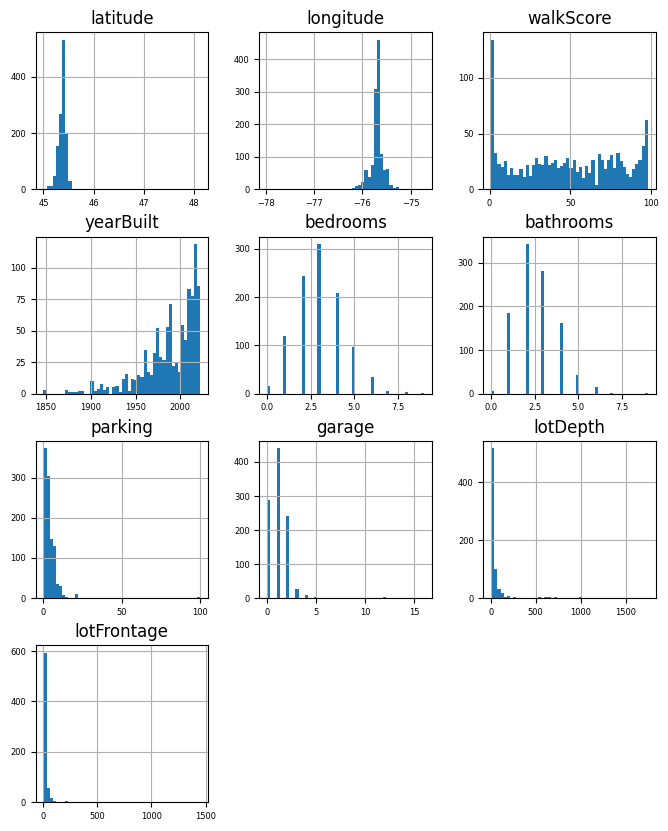

In [7]:
realEstate.hist(figsize=(8, 10), bins=50, xlabelsize=6, ylabelsize=6);

#### Understandng the datatypes

In [8]:
realEstate.dtypes

latitude        float64
longitude       float64
postalCode       object
walkScore       float64
propertyType     object
style            object
yearBuilt       float64
bedrooms        float64
bathrooms       float64
parking         float64
garage          float64
lotDepth        float64
lotFrontage     float64
price            object
dtype: object

#### Missing values

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(realEstate)

Your selected dataframe has 14 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
lotDepth,555,44.2
lotFrontage,555,44.2
yearBuilt,258,20.6
garage,240,19.1
style,231,18.4
bedrooms,215,17.1
bathrooms,214,17.1
parking,212,16.9
propertyType,64,5.1
postalCode,57,4.5


#### Convert price column to float values

In [10]:
realEstate['price'].replace(',','', regex=True, inplace=True)

realEstate['priceNew'] = realEstate['price'].astype(float)
realEstate

,latitude,longitude,postalCode,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price,priceNew
0,45.442725,-76.048296,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1127.76,1447.80,2500000,2500000.0
1,45.146541,-75.941510,K0A 1B0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1402.08,609.60,495000,495000.0
2,45.317009,-76.140878,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,638.86,470.92,365000,365000.0
3,46.179294,-74.727161,K4C 1H9,7.0,Commercial,NaN,2020.0,NaN,NaN,0.0,NaN,545.59,411.48,799000,799000.0
4,45.314785,-75.563076,K1G 3N4,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,983.60,402.17,9830500,9830500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,45.337830,-75.438764,K4B1T8,1.0,Vacant Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200000,3200000.0
1251,45.117496,-75.517627,K0C2K0,1.0,Vacant Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600000,600000.0
1252,45.515350,-76.191957,K0A3M0,1.0,Vacant Land,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,99000,99000.0
1253,45.426766,-75.656006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Function to check the random imputation

In [121]:
def checkrandomImpute(df,targetColumn,imputedColumn):
    X=df.drop(columns=[targetColumn])
    y=df[targetColumn]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
    outputColumnName = imputedColumn + 'Imputed'
    X_train[outputColumnName]=X_train[imputedColumn]
    X_test[outputColumnName]=X_test[imputedColumn]
    nullMaskTrain = X_train[outputColumnName].isnull()
    nullMaskTest = X_test[outputColumnName].isnull()
    X_train[outputColumnName][nullMaskTrain] = X_train[imputedColumn].dropna().sample(nullMaskTrain.sum()).values
    X_test[outputColumnName][nullMaskTest] = X_train[imputedColumn].dropna().sample(nullMaskTest.sum()).values
  
    
    ## Figures
    plt.figure(figsize=(5,5))
    
    sns.kdeplot(X_train[imputedColumn],label = 'Original')
    sns.kdeplot(X_train[outputColumnName],label = 'Imputed')
    plt.legend()
    plt.show()
  
    X_train[[imputedColumn,outputColumnName]].boxplot(figsize = (5,5)) 

In [122]:
realEstateNum = realEstate.select_dtypes(include = ['float64', 'int64'])
realEstateObj = realEstate.select_dtypes(include = ['object'])
realEstateObj = realEstateObj.drop(['price'],axis = 1)
missingCols = realEstateNum.columns[realEstateNum.isna().any()].tolist()


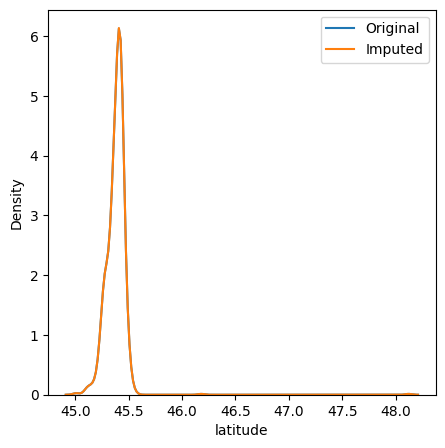

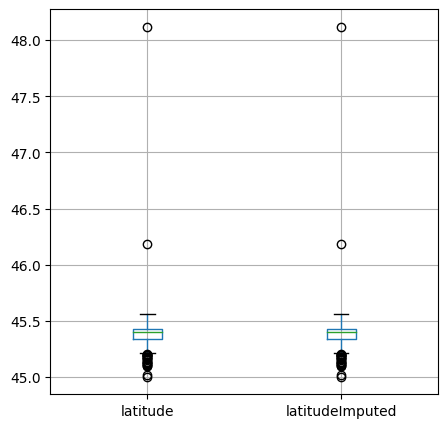

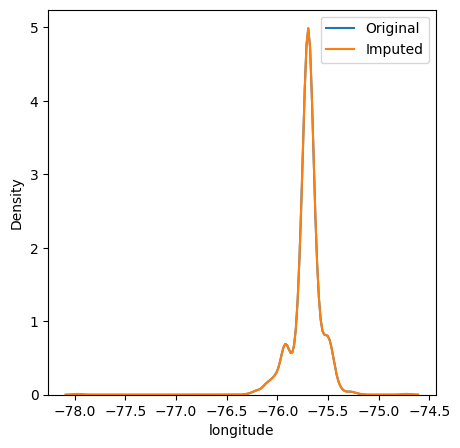

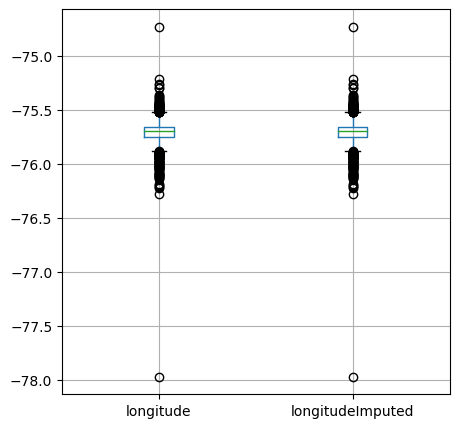

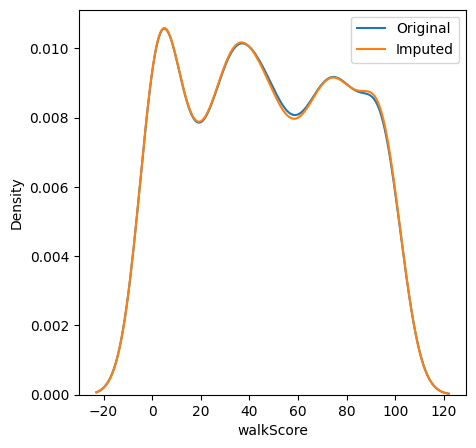

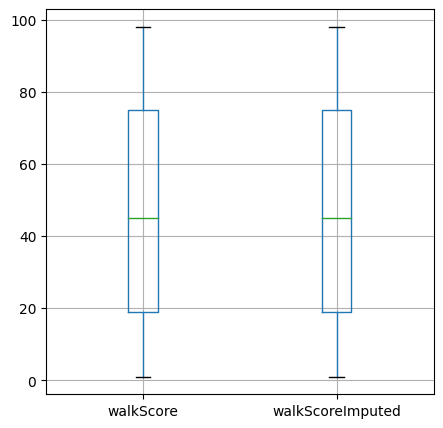

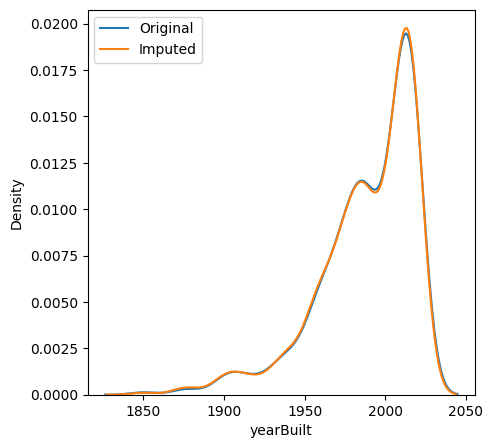

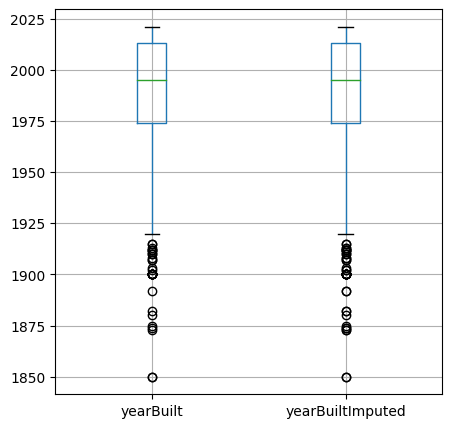

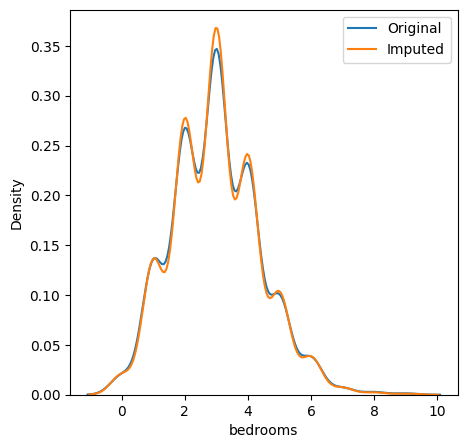

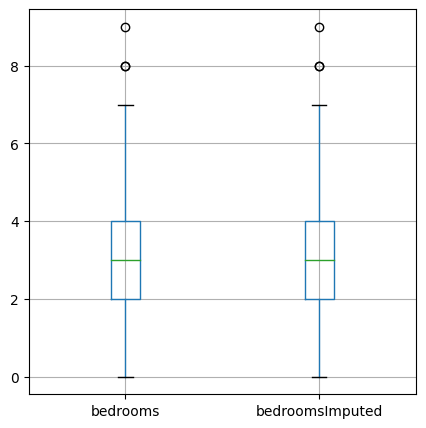

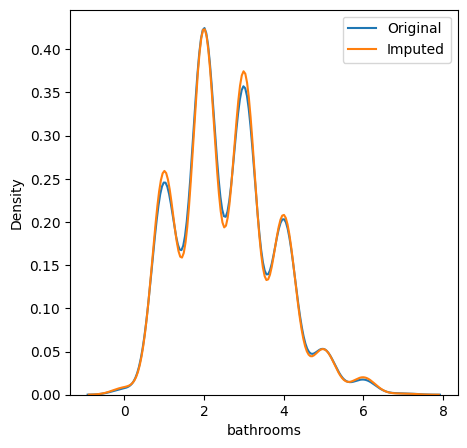

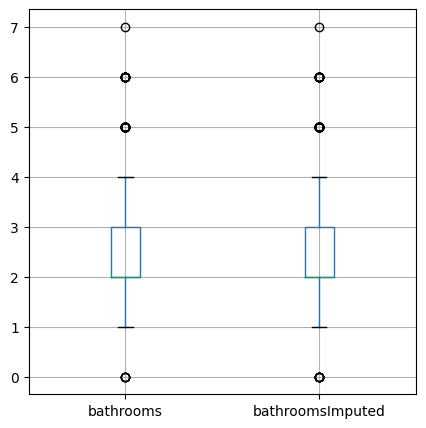

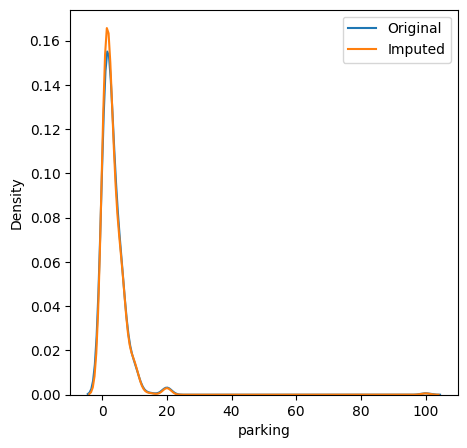

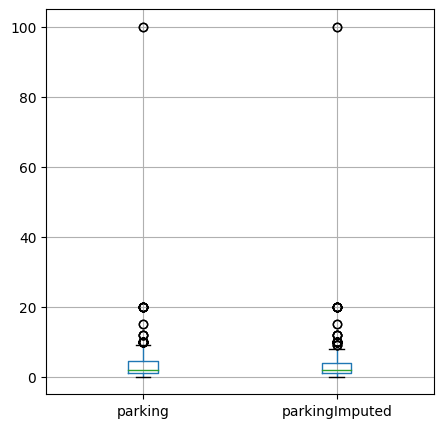

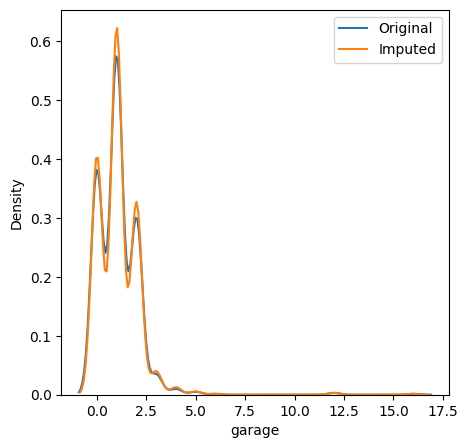

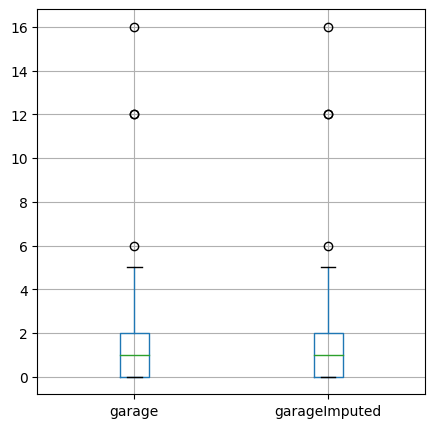

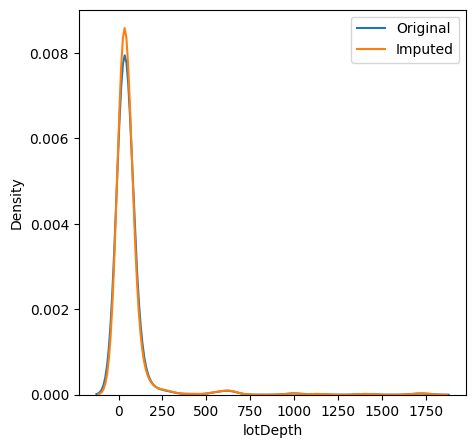

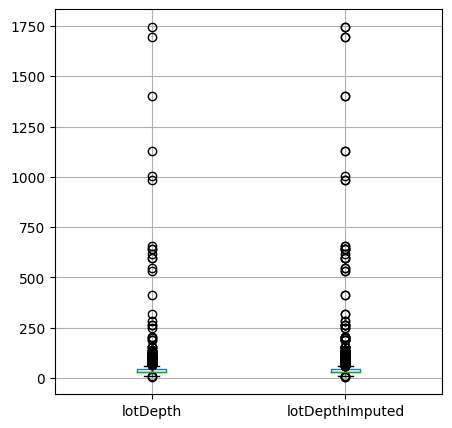

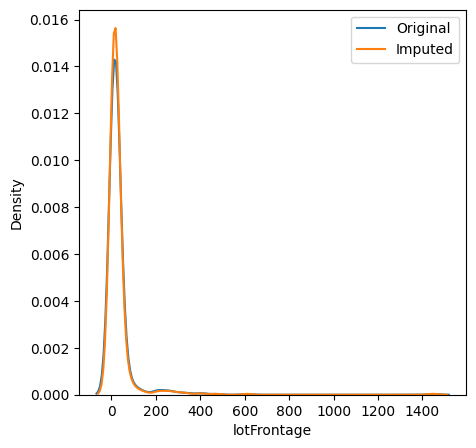

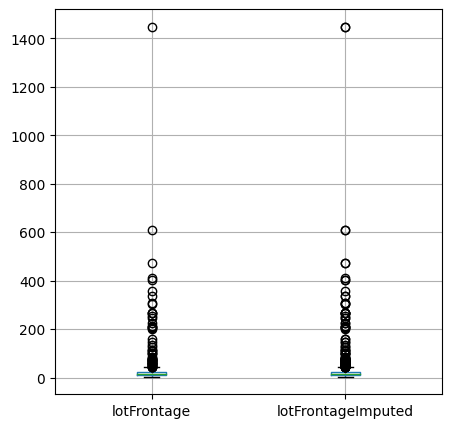

In [123]:

for i in missingCols:
    if (i != 'priceNew'):
        checkrandomImpute(realEstateNum,'priceNew',i)
        

#### Function to do random imputation

In [18]:
def doRandomImpute(df,targetColumn,imputedColumn, inPlace = True):
    if inPlace: 
        outputColumnName = imputedColumn
    else:
        outputColumnName = imputedColumn + 'Imputed'
    df[outputColumnName]=df[imputedColumn]
    nullMaskTrain = df[outputColumnName].isnull()
    df[outputColumnName][nullMaskTrain] = df[imputedColumn].dropna().sample(nullMaskTrain.sum(), random_state=0).values  
    

In [19]:
for i in missingCols:
    if (i != 'priceNew'):
        doRandomImpute(realEstateNum,'priceNew',i)
        

In [20]:
missing_values_table(realEstateNum)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
priceNew,22,1.8


#### Combining the numeric and object dataframes

In [124]:
updatedRealEstate = pd.concat([realEstateNum,realEstateObj],axis=1)

In [22]:
missing_values_table(updatedRealEstate)

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
style,231,18.4
propertyType,64,5.1
postalCode,57,4.5
priceNew,22,1.8


In [23]:
updatedRealEstate['propertyType'].describe()

count            1191
unique             10
top       Residential
freq              976
Name: propertyType, dtype: object

#### Visualizing the property types

<AxesSubplot: >

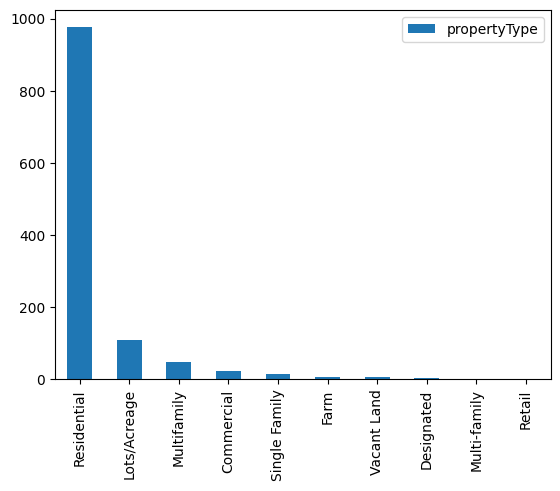

In [24]:
pd.DataFrame(updatedRealEstate['propertyType'].value_counts()).plot(kind='bar')

#### Function for KDE comparison

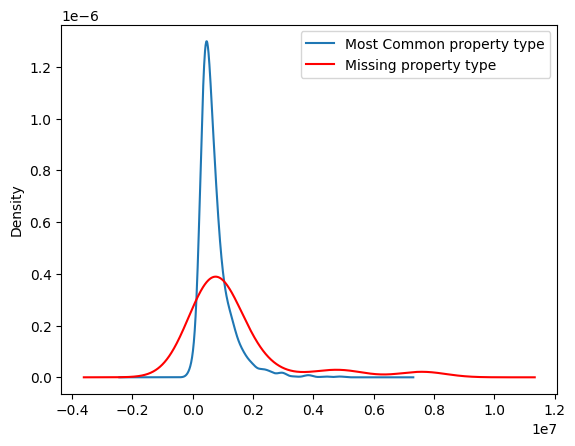

In [25]:
def performKdeComparison(df,xAxis,yAxis,valueToCompare, xLabel = "xLabel", yLabel ='yLabel' ):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[df[xAxis] == valueToCompare][yAxis].plot(kind='kde',ax=ax)
    df[df[xAxis].isnull()][yAxis].plot(kind='kde',ax=ax, color='red')
    lines,labels = ax.get_legend_handles_labels()
    labels = [xLabel,yLabel]
    ax.legend(lines,labels,loc='best')

performKdeComparison(updatedRealEstate, 'propertyType', 'priceNew', 'Residential', 'Most Common property type', 'Missing property type')


In [26]:
temp=realEstate[realEstate['propertyType']=='Residential']['priceNew']
updatedRealEstate['propertyType'].fillna('Residential',inplace=True)

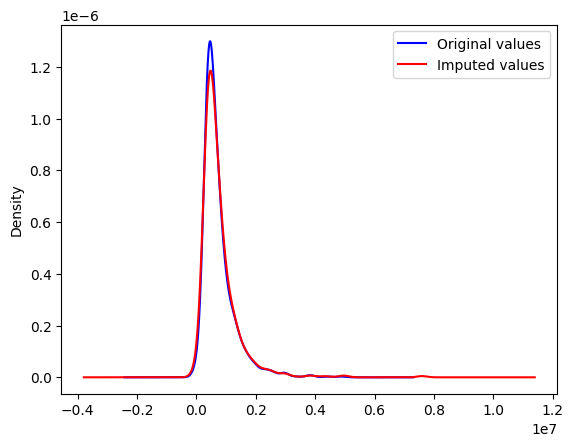

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',color='blue')
realEstate[updatedRealEstate['propertyType']=='Residential']['priceNew'].plot(kind='kde',color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original values','Imputed values']
ax.legend(lines,labels,loc='best')

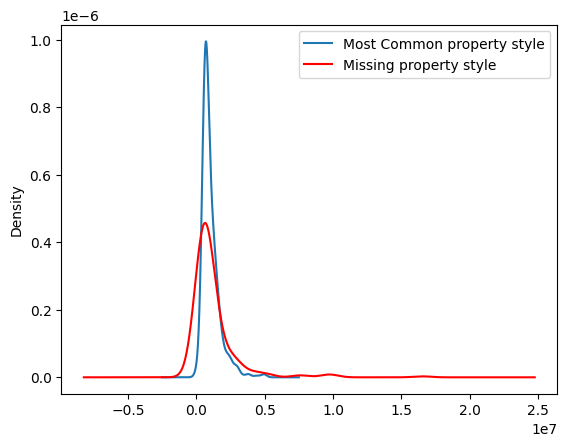

In [28]:
performKdeComparison(updatedRealEstate, 'style', 'priceNew', 'Detached', 'Most Common property style', 'Missing property style')


In [29]:
temp=updatedRealEstate[updatedRealEstate['style']=='Detached']['priceNew']
updatedRealEstate['style'].fillna('Detached',inplace=True)


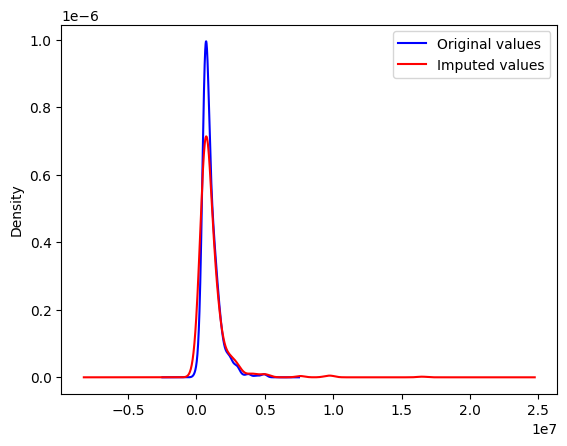

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',color='blue')
updatedRealEstate[updatedRealEstate['style']=='Detached']['priceNew'].plot(kind='kde',color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original values','Imputed values']
ax.legend(lines,labels,loc='best')


In [31]:
updatedRealEstate['postalCode'].describe()

count        1198
unique        877
top       K0A 1L0
freq           16
Name: postalCode, dtype: object

In [32]:
updatedRealEstate.head()

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew,postalCode,propertyType,style
0,45.442725,-76.048296,1.0,1990.0,2.0,2.0,1.0,2.0,1127.76,1447.80,2500000.0,K0A 1L0,Lots/Acreage,Detached
1,45.146541,-75.941510,1.0,2010.0,2.0,4.0,5.0,3.0,1402.08,609.60,495000.0,K0A 1B0,Lots/Acreage,Detached
2,45.317009,-76.140878,1.0,1972.0,5.0,1.0,3.0,1.0,638.86,470.92,365000.0,K0A 1L0,Lots/Acreage,Detached
3,46.179294,-74.727161,7.0,2020.0,5.0,1.0,0.0,0.0,545.59,411.48,799000.0,K4C 1H9,Commercial,Detached
4,45.314785,-75.563076,1.0,1914.0,3.0,1.0,0.0,1.0,983.60,402.17,9830500.0,K1G 3N4,Lots/Acreage,Detached


#### Updating null postal codes with 'Missing'

In [33]:
updatedRealEstate['postalCode'] = updatedRealEstate['postalCode'].fillna('Missing')

In [34]:
updatedRealEstate

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew,postalCode,propertyType,style
0,45.442725,-76.048296,1.0,1990.0,2.0,2.0,1.0,2.0,1127.76,1447.80,2500000.0,K0A 1L0,Lots/Acreage,Detached
1,45.146541,-75.941510,1.0,2010.0,2.0,4.0,5.0,3.0,1402.08,609.60,495000.0,K0A 1B0,Lots/Acreage,Detached
2,45.317009,-76.140878,1.0,1972.0,5.0,1.0,3.0,1.0,638.86,470.92,365000.0,K0A 1L0,Lots/Acreage,Detached
3,46.179294,-74.727161,7.0,2020.0,5.0,1.0,0.0,0.0,545.59,411.48,799000.0,K4C 1H9,Commercial,Detached
4,45.314785,-75.563076,1.0,1914.0,3.0,1.0,0.0,1.0,983.60,402.17,9830500.0,K1G 3N4,Lots/Acreage,Detached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,45.337830,-75.438764,1.0,1965.0,2.0,1.0,1.0,1.0,45.72,30.48,3200000.0,K4B1T8,Vacant Land,Detached
1251,45.117496,-75.517627,1.0,2020.0,2.0,9.0,5.0,0.0,30.48,10.25,600000.0,K0C2K0,Vacant Land,Detached
1252,45.515350,-76.191957,1.0,1986.0,2.0,0.0,4.0,1.0,19.20,19.51,99000.0,K0A3M0,Vacant Land,Detached
1253,45.426766,-75.656006,47.0,1975.0,4.0,3.0,2.0,1.0,22.78,12.18,NaN,Missing,Residential,Detached


In [35]:
missing_values_table(updatedRealEstate)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
priceNew,22,1.8


In [36]:
updatedRealEstate.corr()

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew
latitude,1.000000,-0.104798,0.242824,-0.004520,-0.082711,-0.124559,-0.118238,-0.136889,-0.033247,0.056435,-0.024212
longitude,-0.104798,1.000000,0.054282,-0.017454,-0.021728,0.020347,-0.025522,-0.030513,-0.014184,-0.054496,-0.002929
walkScore,0.242824,0.054282,1.000000,-0.013271,-0.353538,-0.292840,-0.250384,-0.289229,-0.128229,-0.122771,-0.076069
yearBuilt,-0.004520,-0.017454,-0.013271,1.000000,-0.195983,0.003235,-0.060813,0.082449,0.023377,0.013292,-0.029607
bedrooms,-0.082711,-0.021728,-0.353538,-0.195983,1.000000,0.550917,0.272445,0.320346,-0.018246,-0.005691,0.234595
bathrooms,-0.124559,0.020347,-0.292840,0.003235,0.550917,1.000000,0.206845,0.321116,-0.066185,-0.051360,0.271939
parking,-0.118238,-0.025522,-0.250384,-0.060813,0.272445,0.206845,1.000000,0.461504,-0.004652,0.003881,0.144767
garage,-0.136889,-0.030513,-0.289229,0.082449,0.320346,0.321116,0.461504,1.000000,0.005173,0.046683,0.206988
lotDepth,-0.033247,-0.014184,-0.128229,0.023377,-0.018246,-0.066185,-0.004652,0.005173,1.000000,0.753326,0.086186
lotFrontage,0.056435,-0.054496,-0.122771,0.013292,-0.005691,-0.051360,0.003881,0.046683,0.753326,1.000000,0.080093


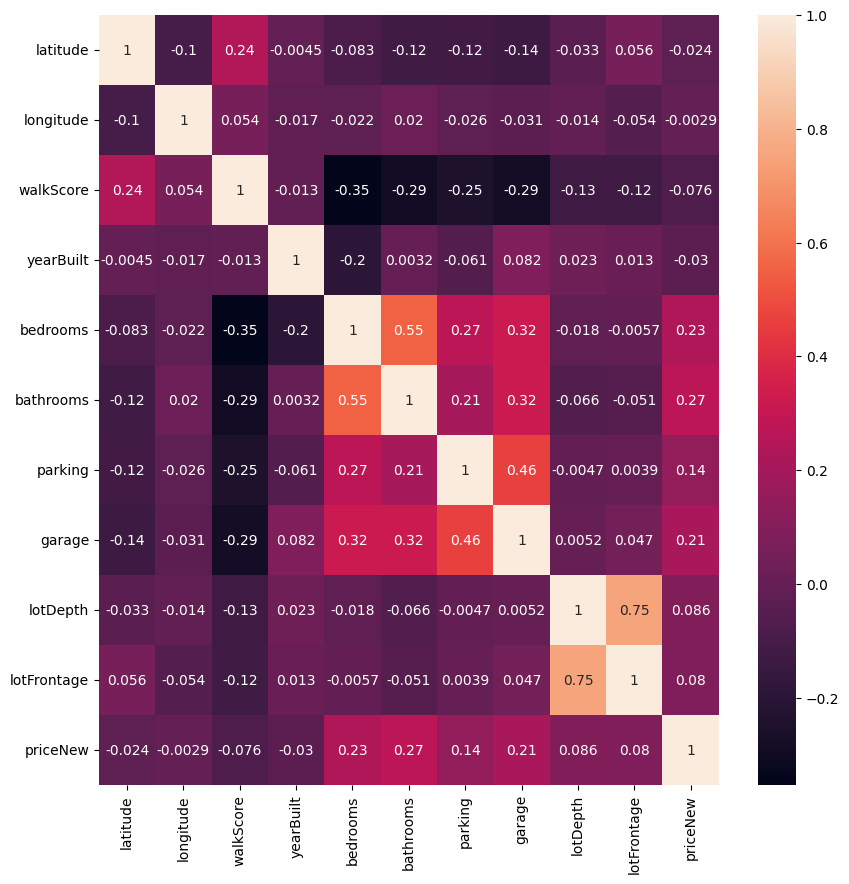

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(updatedRealEstate.corr(),annot=True);

In [38]:
updatedRealEstate.isna().sum()
updatedRealEstate.dtypes

latitude        float64
longitude       float64
walkScore       float64
yearBuilt       float64
bedrooms        float64
bathrooms       float64
parking         float64
garage          float64
lotDepth        float64
lotFrontage     float64
priceNew        float64
postalCode       object
propertyType     object
style            object
dtype: object

#### Using Ordinal Encoder for encoding the object type columns

In [39]:
ord_encoder = OrdinalEncoder()
updatedRealEstate[['postalCodeLabel','propertyTypeLabel','styleLabel']] = ord_encoder.fit_transform(updatedRealEstate[['postalCode','propertyType','style']])
updatedRealEstate

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew,postalCode,propertyType,style,postalCodeLabel,propertyTypeLabel,styleLabel
0,45.442725,-76.048296,1.0,1990.0,2.0,2.0,1.0,2.0,1127.76,1447.80,2500000.0,K0A 1L0,Lots/Acreage,Detached,2.0,3.0,7.0
1,45.146541,-75.941510,1.0,2010.0,2.0,4.0,5.0,3.0,1402.08,609.60,495000.0,K0A 1B0,Lots/Acreage,Detached,0.0,3.0,7.0
2,45.317009,-76.140878,1.0,1972.0,5.0,1.0,3.0,1.0,638.86,470.92,365000.0,K0A 1L0,Lots/Acreage,Detached,2.0,3.0,7.0
3,46.179294,-74.727161,7.0,2020.0,5.0,1.0,0.0,0.0,545.59,411.48,799000.0,K4C 1H9,Commercial,Detached,848.0,0.0,7.0
4,45.314785,-75.563076,1.0,1914.0,3.0,1.0,0.0,1.0,983.60,402.17,9830500.0,K1G 3N4,Lots/Acreage,Detached,72.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,45.337830,-75.438764,1.0,1965.0,2.0,1.0,1.0,1.0,45.72,30.48,3200000.0,K4B1T8,Vacant Land,Detached,840.0,9.0,7.0
1251,45.117496,-75.517627,1.0,2020.0,2.0,9.0,5.0,0.0,30.48,10.25,600000.0,K0C2K0,Vacant Land,Detached,20.0,9.0,7.0
1252,45.515350,-76.191957,1.0,1986.0,2.0,0.0,4.0,1.0,19.20,19.51,99000.0,K0A3M0,Vacant Land,Detached,18.0,9.0,7.0
1253,45.426766,-75.656006,47.0,1975.0,4.0,3.0,2.0,1.0,22.78,12.18,NaN,Missing,Residential,Detached,877.0,6.0,7.0


#### Applying linear regression to fill the missing values in price column

In [40]:
updatedRealEstateNum = updatedRealEstate.select_dtypes(include = ['float64', 'int64'])
test_data = updatedRealEstateNum[updatedRealEstateNum['priceNew'].isnull()]
test_data
train_data = updatedRealEstateNum.dropna()
train_data


X_train = train_data.drop('priceNew',axis=1)
y_train = train_data['priceNew']

lr = LinearRegression()
lr.fit(X_train,y_train)

X_test = test_data.drop('priceNew',axis=1)
X_test

y_pred = lr.predict(X_test)


In [117]:
y_pred.shape

(22,)

In [42]:
test_data.loc[test_data.priceNew.isnull(),'priceNew'] = y_pred

In [43]:
test_data

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew,postalCodeLabel,propertyTypeLabel,styleLabel
1200,45.447530,-76.035185,1.0,1974.0,5.0,5.0,3.0,2.0,36.58,6.10,1.361578e+06,877.0,6.0,1.0
1201,45.461029,-75.529895,23.0,1985.0,4.0,3.0,1.0,1.0,30.48,7.32,9.230481e+05,877.0,6.0,2.0
1202,45.481851,-75.549477,37.0,1989.0,3.0,4.0,1.0,1.0,31.50,7.78,1.036654e+06,877.0,6.0,2.0
1203,45.093032,-75.596381,6.0,2014.0,8.0,9.0,1.0,0.0,30.48,18.29,2.146898e+06,877.0,6.0,2.0
1204,45.424068,-75.696738,1.0,1982.0,3.0,3.0,0.0,2.0,30.85,19.45,8.371899e+05,877.0,6.0,2.0
1205,45.367480,-75.699476,1.0,2011.0,4.0,3.0,4.0,0.0,68.12,30.48,8.095483e+05,877.0,6.0,2.0
1206,45.367480,-75.699476,67.0,1955.0,4.0,3.0,2.0,1.0,105.17,97.77,1.091604e+06,877.0,6.0,2.0
1207,45.270809,-75.752369,23.0,1949.0,3.0,3.0,0.0,1.0,31.70,38.85,8.325789e+05,877.0,6.0,2.0
1222,45.402675,-75.698425,94.0,1985.0,5.0,5.0,0.0,0.0,30.48,8.00,1.424845e+06,877.0,6.0,3.0
1223,45.402675,-75.698425,97.0,1960.0,5.0,5.0,10.0,1.0,30.33,7.88,1.556485e+06,877.0,6.0,3.0


In [44]:
test_data['priceNew'] = test_data['priceNew'].round(decimals = 2)
test_data

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew,postalCodeLabel,propertyTypeLabel,styleLabel
1200,45.447530,-76.035185,1.0,1974.0,5.0,5.0,3.0,2.0,36.58,6.10,1361577.59,877.0,6.0,1.0
1201,45.461029,-75.529895,23.0,1985.0,4.0,3.0,1.0,1.0,30.48,7.32,923048.05,877.0,6.0,2.0
1202,45.481851,-75.549477,37.0,1989.0,3.0,4.0,1.0,1.0,31.50,7.78,1036654.22,877.0,6.0,2.0
1203,45.093032,-75.596381,6.0,2014.0,8.0,9.0,1.0,0.0,30.48,18.29,2146897.74,877.0,6.0,2.0
1204,45.424068,-75.696738,1.0,1982.0,3.0,3.0,0.0,2.0,30.85,19.45,837189.86,877.0,6.0,2.0
1205,45.367480,-75.699476,1.0,2011.0,4.0,3.0,4.0,0.0,68.12,30.48,809548.32,877.0,6.0,2.0
1206,45.367480,-75.699476,67.0,1955.0,4.0,3.0,2.0,1.0,105.17,97.77,1091603.56,877.0,6.0,2.0
1207,45.270809,-75.752369,23.0,1949.0,3.0,3.0,0.0,1.0,31.70,38.85,832578.94,877.0,6.0,2.0
1222,45.402675,-75.698425,94.0,1985.0,5.0,5.0,0.0,0.0,30.48,8.00,1424844.98,877.0,6.0,3.0
1223,45.402675,-75.698425,97.0,1960.0,5.0,5.0,10.0,1.0,30.33,7.88,1556485.26,877.0,6.0,3.0


In [45]:
finalRealEstate = pd.concat([test_data,train_data])
finalRealEstate.isnull().sum()

latitude             0
longitude            0
walkScore            0
yearBuilt            0
bedrooms             0
bathrooms            0
parking              0
garage               0
lotDepth             0
lotFrontage          0
priceNew             0
postalCodeLabel      0
propertyTypeLabel    0
styleLabel           0
dtype: int64

#### Inverse Transforming the data encoded using Ordinal Encoder

In [46]:
finalRealEstate[['postalCode','propertyType','style']] = ord_encoder.inverse_transform(finalRealEstate[['postalCodeLabel','propertyTypeLabel','styleLabel']])
finalRealEstate = finalRealEstate.drop(['postalCodeLabel','propertyTypeLabel','styleLabel'],axis=1)
finalRealEstate

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,priceNew,postalCode,propertyType,style
1200,45.447530,-76.035185,1.0,1974.0,5.0,5.0,3.0,2.0,36.58,6.10,1361577.59,Missing,Residential,2 1/2 Storey
1201,45.461029,-75.529895,23.0,1985.0,4.0,3.0,1.0,1.0,30.48,7.32,923048.05,Missing,Residential,2-Storey
1202,45.481851,-75.549477,37.0,1989.0,3.0,4.0,1.0,1.0,31.50,7.78,1036654.22,Missing,Residential,2-Storey
1203,45.093032,-75.596381,6.0,2014.0,8.0,9.0,1.0,0.0,30.48,18.29,2146897.74,Missing,Residential,2-Storey
1204,45.424068,-75.696738,1.0,1982.0,3.0,3.0,0.0,2.0,30.85,19.45,837189.86,Missing,Residential,2-Storey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,45.328700,-75.927129,7.0,2018.0,1.0,2.0,1.0,1.0,27.01,10.97,499000.00,K2K3P4,Vacant Land,Detached
1249,45.314785,-75.563076,2.0,1946.0,1.0,2.0,3.0,1.0,30.48,15.24,9830500.00,K1G3N4,Vacant Land,Detached
1250,45.337830,-75.438764,1.0,1965.0,2.0,1.0,1.0,1.0,45.72,30.48,3200000.00,K4B1T8,Vacant Land,Detached
1251,45.117496,-75.517627,1.0,2020.0,2.0,9.0,5.0,0.0,30.48,10.25,600000.00,K0C2K0,Vacant Land,Detached


#### Visualizing top three property types and styles

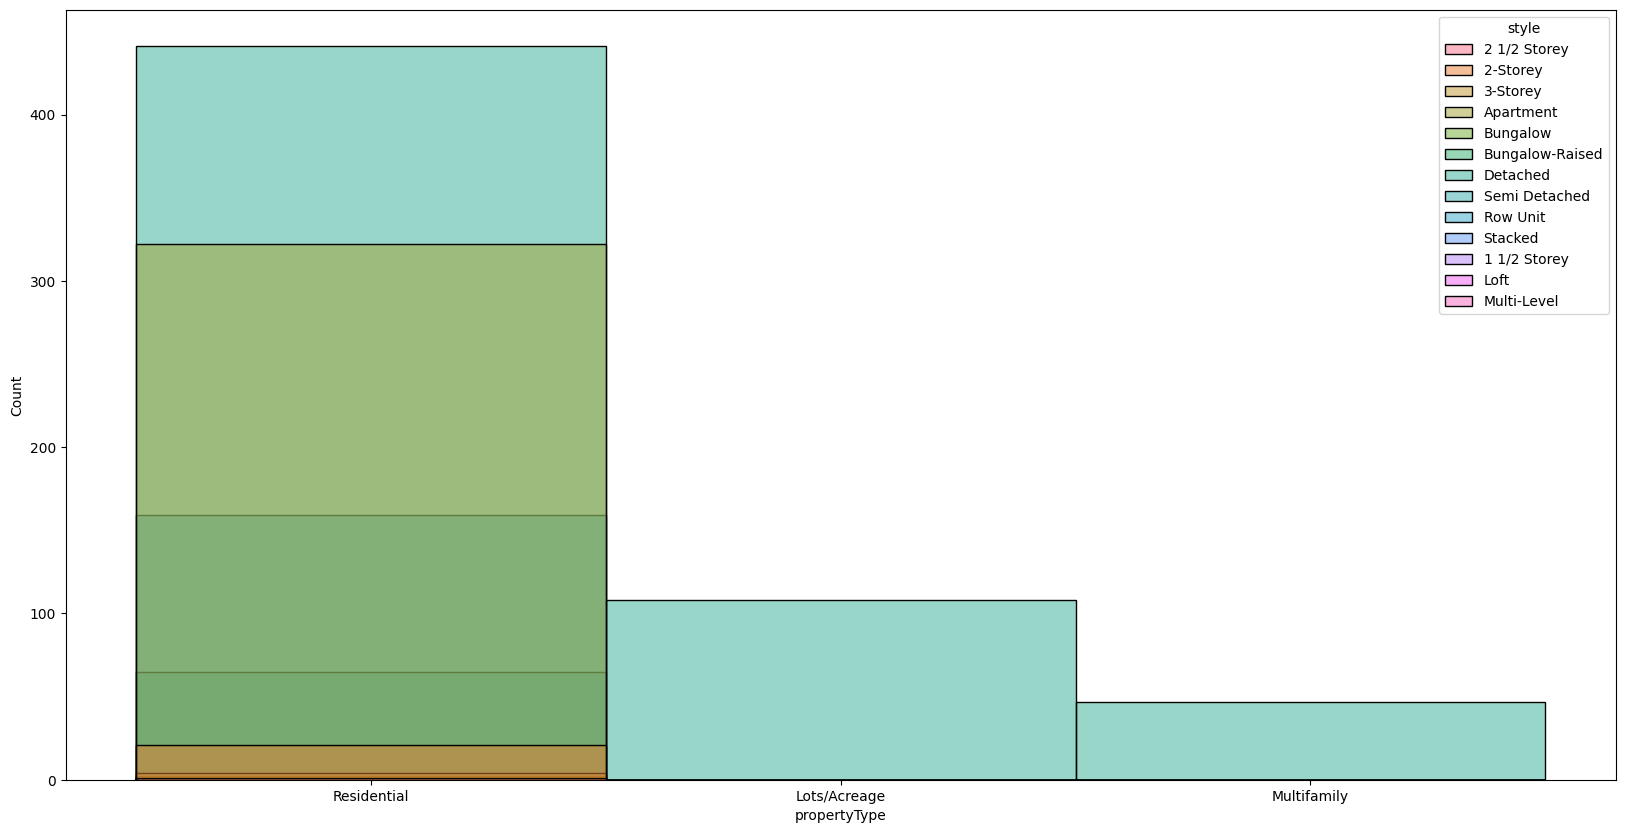

In [95]:
topThreepropertyType=finalRealEstate['propertyType'].value_counts().index.tolist()
topThreepropertyType=finalRealEstate[finalRealEstate['propertyType'].isin(topThreepropertyType[:3])]

plt.figure(figsize=(20,10))
fig = sns.histplot(binwidth=1,
            x='propertyType',
            hue='style',
            data=topThreepropertyType,
            stat="count",
            element = 'bars',
            color='red')

#### Visulaizing the number of bedrooms and bathrooms as per the property type

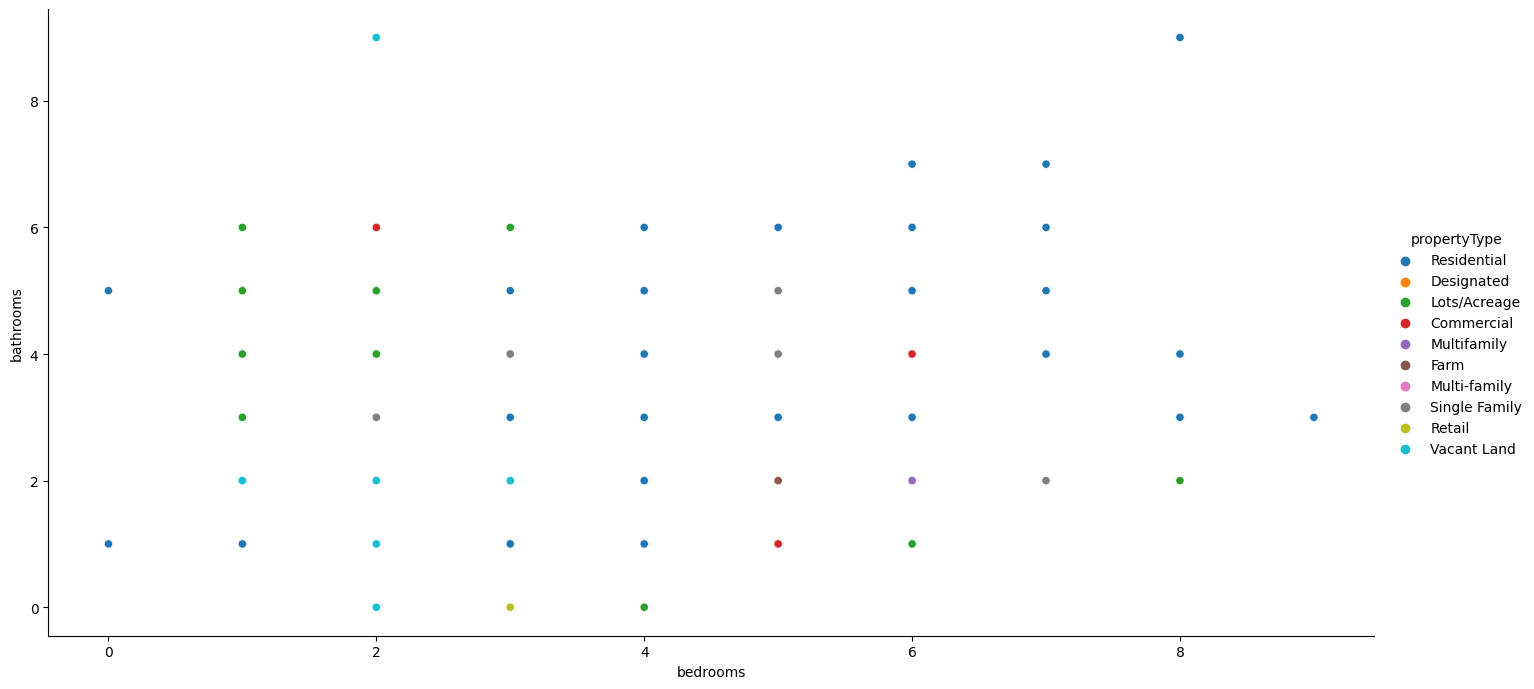

In [126]:
rel=sns.relplot(x='bedrooms', y='bathrooms', hue='propertyType',kind='scatter',data=finalRealEstate,color='red',height=7,aspect=2)


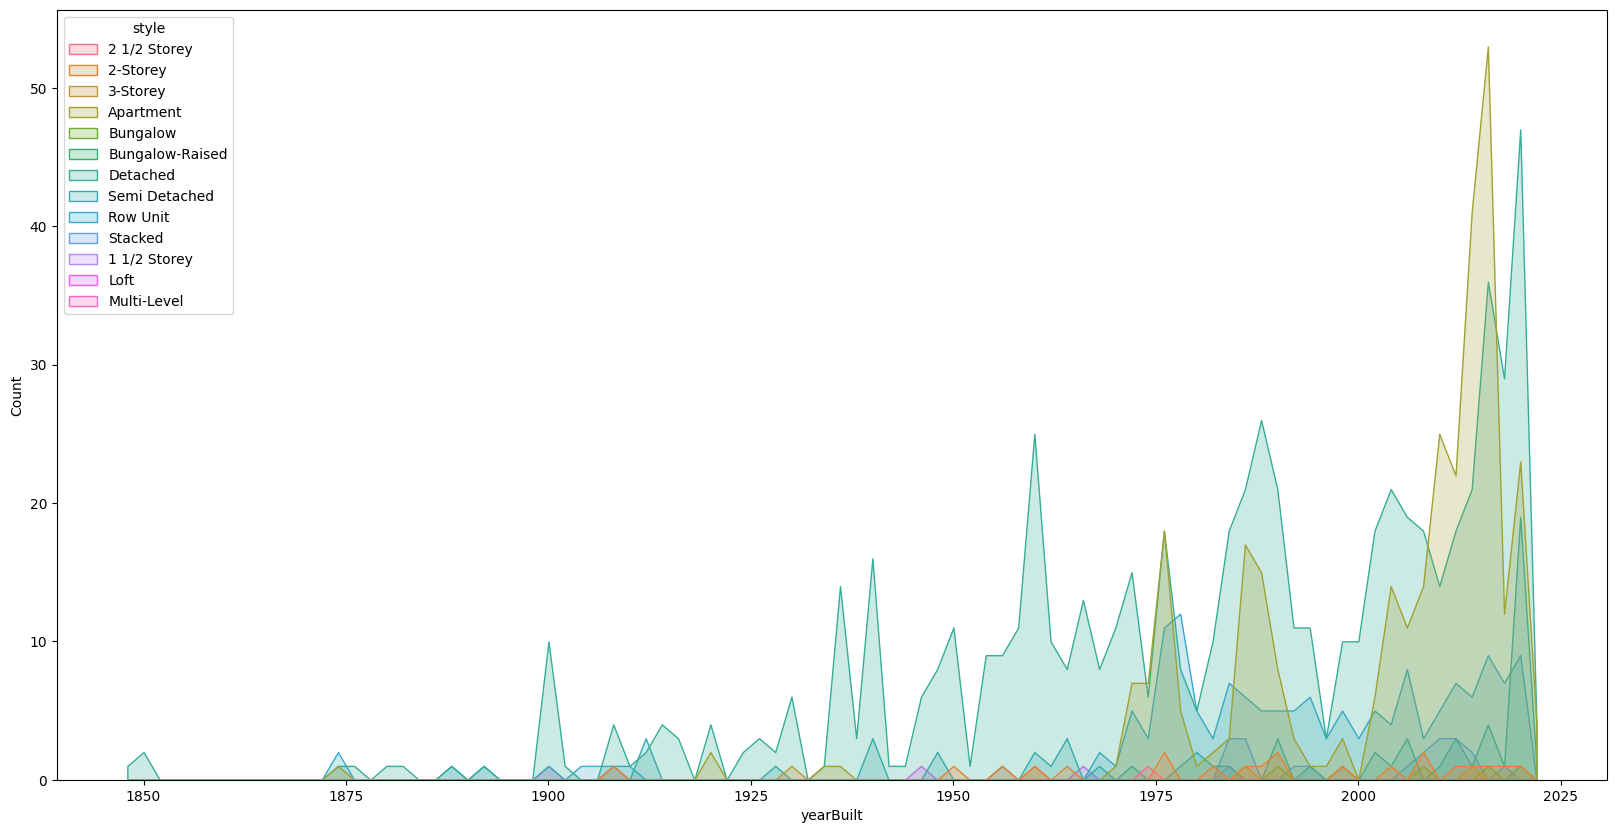

In [128]:
plt.figure(figsize=(20,10))
fig = sns.histplot(binwidth=2,
            x='yearBuilt',
            hue='style',
            data=finalRealEstate,
            stat="count",
            element = 'poly',
            color='red')
sns.move_legend(fig, "upper left")

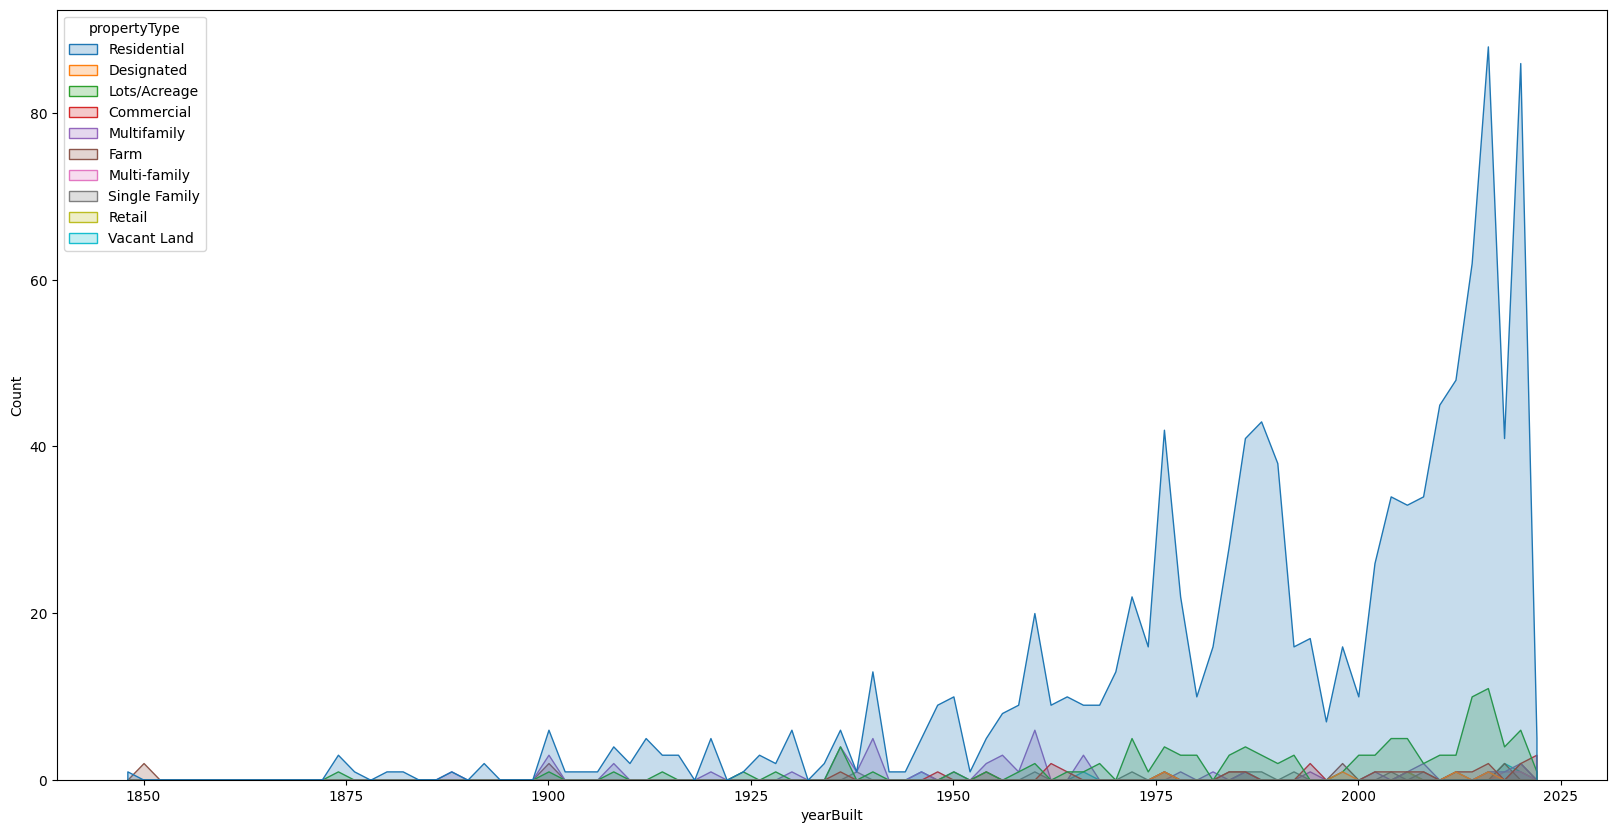

In [98]:
plt.figure(figsize=(20,10))
fig = sns.histplot(binwidth=2,
            x='yearBuilt',
            hue='propertyType',
            data=finalRealEstate,
            stat="count",
            element = 'poly',
            color='red')
sns.move_legend(fig, "upper left")

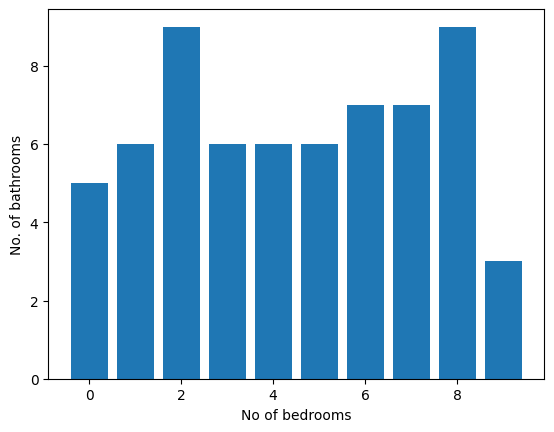

In [78]:
import matplotlib.pyplot as plt
plt.bar(finalRealEstate['bedrooms'],finalRealEstate['bathrooms'])
plt.xlabel("No of bedrooms")
plt.ylabel("No. of bathrooms")
plt.show()

#### Visualizing the walk score

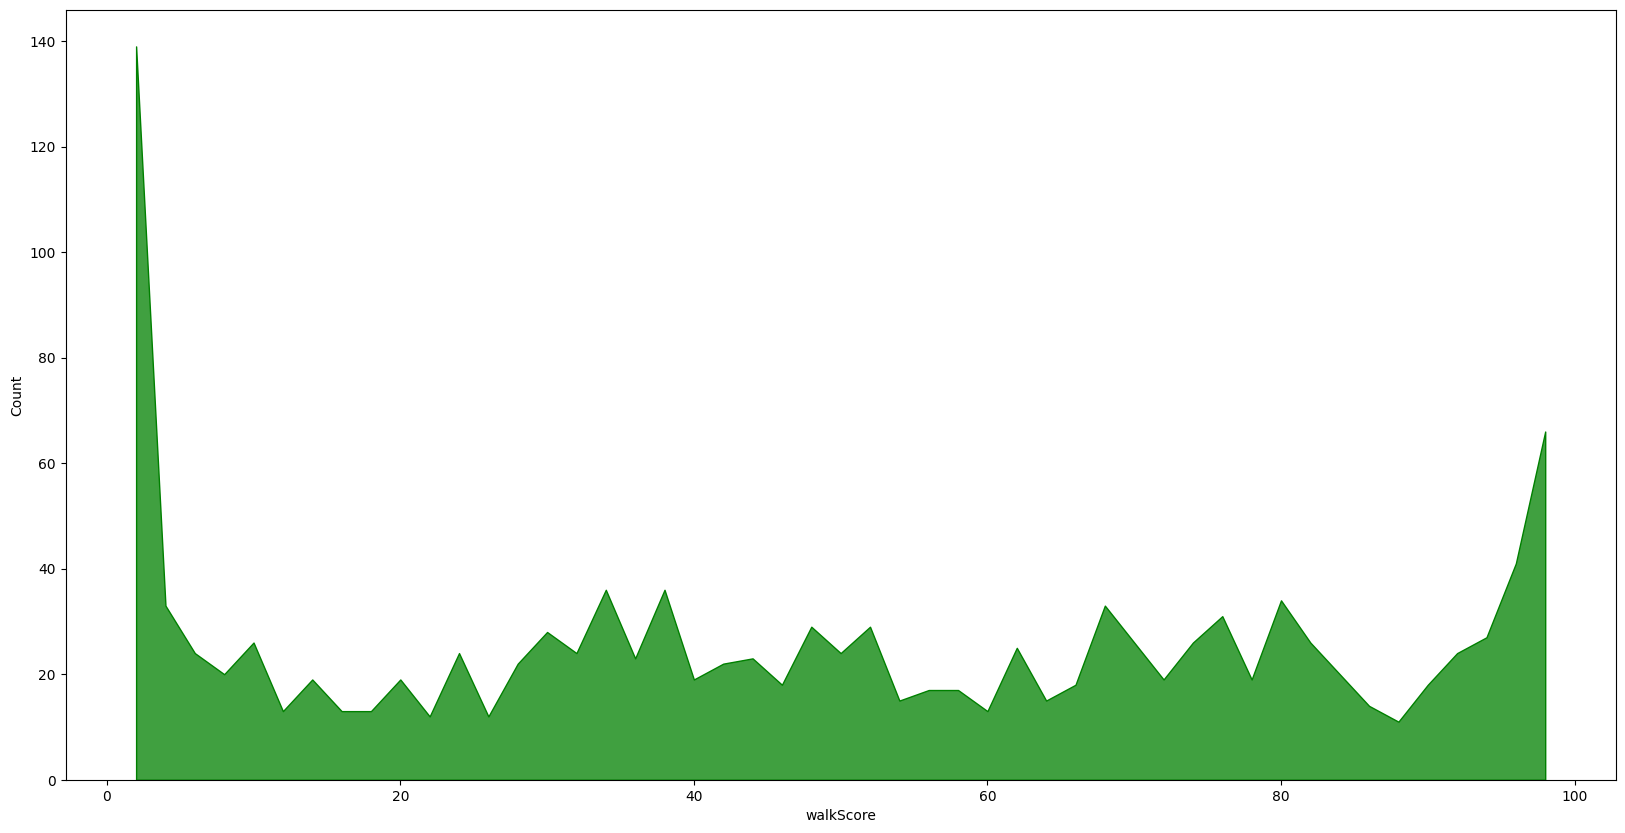

In [111]:
plt.figure(figsize=(20,10))
fig = sns.histplot(binwidth=2,
            x='walkScore',
            data=finalRealEstate,
            stat="count",
            element = 'poly',
            color='green')